# Biodiversity Analysis

In this project, I analyzed data from endangered species in different parks from the National Park Service. 

I performed some data analysis on the conservation statuses of these species and investigated if there are any patterns or themes to the types of species that become endangered. 

The data includes: 

species_info.csv:
- `category`: class of animals
- `scientific_name`: the scientific name of each species
- `common_name`: the common names of each species
- `conservation_status`: each species' current conservation status

observations.csv:
- `scientific_name`: the scientific name of each species
- `park_name`: Park where species were found
- `observations`: the number of times each species was observed at park

#### Project Goals
The main objectives of this analysis, would be to answer these questions: 
* What is the distribution of conservation status for species?
* Are certain types of species more likely to be endangered?
* Are the differences between species and their conservation status significant?
* Which animal is most prevalent and what is their distribution amongs part?

#### Analysis
Descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include: 

1. Distributions
1. counts
1. relationship between species
1. conservation status of species
1. observations of species in parks. 

## Import Python Modules

First, import the modules that will be used in the project. Including data analysis tools: numpy and visualization tools: seaborn and matplotlib

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math


## Load the data

The csv files `observations.csv` and `species_info.csv` are read in DataFrames called species_info and observations. The created DataFrames are view using the .head() Python method returing the first 5 rows. 

### species

The `species_info.csv` contains the data about the different species in the National Parks. The columns include:

* category: the category of taxonomy for the species
* scientific_name: the scientfic name of the species
* common_names: the common name of each species
* conservation_status: indicating the species' risk of extinction

In [157]:
species_info = pd.read_csv('species_info.csv',encoding='utf-8')
species_info.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


### observations

The `observations.csv` contains the information about how many observations of specific animals have been made in each park from the past 7 days.  The columns include:

* scientific_name: the scientific name of the species
* park_name: the name of the National Park
* observations: amount of observations of that specific animal in the past 7 days

In [107]:
observations = pd.read_csv('observations.csv',encoding='utf-8')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


### Data Properties

The dimensions of each data set were retrived using .info() and .shape(): 
* The `species_info` DataFrame contains 5,824 rows and 4 columns
* The `observations` DataFrame contains 23,293 words and 3 columns

In [18]:
print(species_info.info())
print(observations.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


In [19]:
print(f"species info: {species_info.shape}")
print(f"observations: {observations.shape}")

species info: (5824, 4)
observations: (23296, 3)


## Explore the Data

Let's explore the data more in depth, finding the distinct species in the data. There are 5,541 unique species. 

In [21]:
print(f"number of species: {species_info.scientific_name.nunique()}")

number of species: 5541


#### Categories
There are 7 different categories of animals/plants including: Mammal, Bird, Reptile, Amphibian, Fish, Vascular Plant and Nonvascular Plant 

In [40]:
print(f"Number of categories: {species_info.category.nunique()}")
print(f"Categories: {species_info.category.unique()}")

Number of categories: 7
Categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


Let's check the amount of values per category: 
* The largest share of species: Vascular Plant with 4,470 in the data
* The smallest share of species: Reptile with only 79 in the data

In [24]:
species_info.groupby("category").size().sort_values(ascending=False)

category
Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
dtype: int64

Exploring the `conservation_status` column we can confirm that:
* there are 4 unique conservation statuses: `Species of Concern`, `Endangered`, `Threatened`,  `In Recovery`

In [25]:
print(f"Number of conservation statuses: {species_info.conservation_status.nunique()}")
print(f"Unique consevation statuses: {species_info.conservation_status.unique()}")

Number of conservation statuses: 4
Unique consevation statuses: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


##### Understanding Nan values
In a database or pandas DataFrame, NaN stands for “Not a Number.” It represents missing, undefined, or null values in numerical and non-numerical columns.
There are 5,633 values in the `species` DataFrame without conservation status

In [182]:
print(f"na values: {species_info.conservation_status.isna().sum()}")

na values: 5633


There are:
* 161 species are Species of Concern
* 16 species Endangered
* 10 species are Threatened
* 4 species in Recovery

In [28]:
print(species_info.groupby("conservation_status").size().sort_values(ascending=False))

conservation_status
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
dtype: int64


### observations

There are 4 National Parks:
* Great Smoky Mountains National Park
* Yosemite National Park
* Bryce National Park
* Yellowstone National Park

In [30]:
print(f"Number of observations per park: {observations.park_name.unique()}")
print(f"Number of observations per park: {observations.park_name.nunique()}")



Number of observations per park: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
Number of observations per park: 4


There are 3,314,739 sightings in the last 7 days

In [32]:
print(f"number of observations: {observations.observations.sum()}")

number of observations: 3314739


## Analysis

This section will analyze the data after the initial exploration. First, will be to clean and explore the `consevation_status` column in `species`

The column `conservation_status` has this values:
* Species of Concern: declining or appear to be in need of conservation
* Threatened: vulnerable to endangerement in the near future
* Enangered: seriously at risk of extinction
* In Recovery: formerley Endangered, but currently neither in danger of extinction throughout all or a significant portion of its range

#### Clear `nan` values
In the exploration, a lot of `nan` values were detected. I am going to convert them to `No Intervation`

In [183]:
species_info.fillna('No Intervation', inplace=True)
species_info.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
No Intervation        5633
Species of Concern     161
Threatened              10
dtype: int64

In [184]:
species_info.replace('No Intervation', 'No Intervention', inplace=True)
species_info.groupby('conservation_status').size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

Next is to review the different categories that are nested in the `conservation_status` column except for the ones that are categorized as `No Intervention`

In [185]:
conservationCategory = species_info[species_info.conservation_status != 'No Intervention']\
    .groupby(["conservation_status", "category"])["scientific_name"]\
    .count()\
    .unstack()

conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


In `Endangered` status 7 were mammals, and 4 were birds. In the `In Recovery` status, there were 3 birds and 1 mammals. 

Text(0, 0.5, 'Number of species')

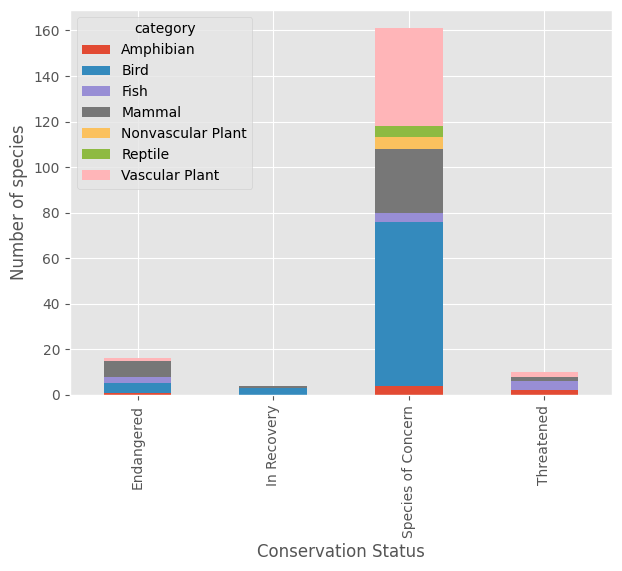

In [22]:
plt.style.use('ggplot')  # Alternatives: 'classic', 'bmh', 'seaborn-dark', 'fast'
ax = conservationCategory.plot(kind = 'bar', figsize=[7,5], stacked=True)
ax.set_xlabel('Conservation Status')
ax.set_ylabel('Number of species')

#### In conservation

The next question is to understand is there are certain types of species more likely to be endangered? To check, I create a new column called `is_protected`

In [190]:
species_info['is_protected'] = species_info.conservation_status != 'No Intervention'

In [191]:
true_counts = species_info['is_protected'].value_counts()
true_counts

is_protected
False    5633
True      191
Name: count, dtype: int64

Once the `is_protected` column in created, show the breakdown of each species type and protection status.

In [154]:
category_counts = species_info.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot_table(columns='is_protected',
                                      index='category',
                                      values='scientific_name', 
                                      fill_value=0)\
                        .reset_index()
category_counts



is_protected,category,True
0,Amphibian,79.0
1,Bird,488.0
2,Fish,125.0
3,Mammal,176.0
4,Nonvascular Plant,333.0
5,Reptile,78.0
6,Vascular Plant,4262.0


Birds, mammmals and vascular plants have a higher absolute numbers of species protected

However, absolute numbers are not the most useful statistc, therefore I calculate the rate of protection that each `category` exhibits in the data. 
From this analysis we can see that 17% of mammals are protected, while 15% and 8% of birds and amphibians are protected, respectively. 

In [75]:
category_counts['percent_protected'] = category_counts.protected / (category_counts.protected + category_counts.not_protected) * 100
category_counts.sort_values(by='percent_protected', ascending=False)

,not_protected,protected,percent_protected
category,,,
Mammal,146.0,30.0,17.045455
Bird,413.0,75.0,15.368852
Amphibian,72.0,7.0,8.860759
Fish,115.0,11.0,8.730159
Reptile,73.0,5.0,6.410256
Nonvascular Plant,328.0,5.0,1.501502
Vascular Plant,4216.0,46.0,1.079305


#### Statistical Analysis

##### Chi-square test: Mammals vs. Birds
This test is important because it shows wheter some species groups are receviving significantly different protection levels, which could reveal biases or priorities in conservation. 

I am going to run some chi-square test to see if different species have statistically significant differences in conservaion status reates. In order to run a chi-square test,a contingency table will be need to be created.

||protected|not protected|
|-|-|-|
|Mammal|30|146|
|Bird|75|413|

In [79]:
# Import function chi2_contigency: performing a chi-square test of independence in a contigency table
from scipy.stats import chi2_contingency

# Table of contingency: how two categories are related, studying the relationship
contingency1 = [[30, 146],
              [75, 413]]
# Running the test
chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=np.float64(0.1617014831654557), pvalue=np.float64(0.6875948096661336), dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))

The chi-square test give a result of:
* p-value: 0.69. p-value that is considered small is 0.05, the value of 0.69 is larger than 0.05. In the case of mammals and birds there doesn't seem to be any significant relationship between them, the variables are independent.
* So in this case, we can conclude that mammals are not more likely to receive protection than birds. 

##### Chi-square test: Mammals vs. Reptiles

Now let's compare the relationship between Mammals and reptiles, applying a chi-square test

||protected|not protected|
|-|-|-|
|Mammal|30|146|
|Reptile|5|73|

In [81]:
# Import function chi2_contigency: performing a chi-square test of independence in a contigency table
from scipy.stats import chi2_contingency

# Table of contingency: how two categories are related, studying the relationship
contingency1 = [[30, 146],
              [5, 73]]
# Running the test
chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=np.float64(4.289183096203645), pvalue=np.float64(0.038355590229699), dof=1, expected_freq=array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))

The chi-square test give a result of:
* p-value: 0.03. p-value that is considered small is 0.05, the value of 0.03 is smaller than 0.05. In the case the difference between reptiles and mammals is statistically significant. Mammals are shown to have a statistically significant higher rate of needed protection compared to reptiles.
* It suggests that mammals are more likely to receive protection than others like reptiles.

##### Chi-square test: Mammals vs. Amphibians

In [82]:
# Import function chi2_contigency: performing a chi-square test of independence in a contigency table
from scipy.stats import chi2_contingency

# Table of contingency: how two categories are related, studying the relationship
contingency1 = [[30, 146],
              [7, 72]]
# Running the test
chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=np.float64(2.321746712946015), pvalue=np.float64(0.1275766969319887), dof=1, expected_freq=array([[ 25.5372549, 150.4627451],
       [ 11.4627451,  67.5372549]]))

The chi-square test give a result of:
* p-value: 0.12. As p-value is not < 0.05, it suggests that mammals are not more likely to receive protection than amphibians

##### Chi-square test: Global Contingency table
This tables is going to include all species, to check if there's is a significant association

In [83]:
# Import function chi2_contigency: performing a chi-square test of independence in a contigency table
from scipy.stats import chi2_contingency

# Table of contingency: how two categories are related, studying the relationship
contingency_table = [
    [146, 30],   # Mammal
    [413, 75],   # Bird
    [72, 7],     # Amphibian
    [115, 11],   # Fish
    [73, 5],     # Reptile
    [328, 5],    # Nonvascular Plant
    [4216, 46]   # Vascular Plant
]

# Run the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print(f"Chi2 statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi2 statistic: 426.5293138320011
P-value: 5.5108280473137505e-89
Degrees of freedom: 6
Expected frequencies:
[[1.70315410e+02 5.68459040e+00]
 [4.72238181e+02 1.57618188e+01]
 [7.64483941e+01 2.55160592e+00]
 [1.21930350e+02 4.06964995e+00]
 [7.54806929e+01 2.51930711e+00]
 [3.22244497e+02 1.07555034e+01]
 [4.12434248e+03 1.37657524e+02]]


The p-value is 5.51e-89 < 0.05. What does this mean?
* The probability that these protection counts across categories happended by random change is basically zero.
* So: there is a strong, statistically significant association between the type of species and whether it's protected
* Some categories (like mammals) are protected more often than others, way beyond what would happen by random chance.

#### Park Distribution

The next question is: which animal is more prevalent and what is their distribution amongst parks? 

To understand the distribution, the first step is to look at the common names from `species_info` to get and idea of the most prevalent animals in the dataset

In [161]:
# Library to flatten lists 
from itertools import chain
import string

# string.punctuation gives a string of all punctuation characters (!#@{}-./)
# loops through every punctuation mark and removes it, replacing it with an empty string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

# Processing mammals name. Filter rows where category is Mammal, selection common_names column, apply the punctunation removal function to each common name in the column. 
# Split each clean-up name into a list of words
# Turns the entire column into a Python list
common_Names = species_info[species_info.category == "Mammal"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

# Shows first items of that list
common_Names[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

Clean the duplicate words in each row since they should not be counted more than once per species

In [162]:
cleanRows = []

for item in common_Names:
    # Converting each item into a dictionary, which removes duplicates. Dictionaries can't have duplicate keys, and then converting it back to a list.
    item = list(dict.fromkeys(item))
    cleanRows.append(item)
    
# Shows first items of that list    
cleanRows[:6]


[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

In [163]:
# The chain.from_iterable function is part of the itertools module. It is used to take and iterable of iterables (like a list of lists) and flatten it into a single iterable
# If i is a list, it keeps i as an element, passed unchanged. If i is not a list, it wraps i inside a new list [i]
# After flattening all of the elements, the results is converted into a list using list()
res = list(chain.from_iterable(
    i if isinstance(i, list) 
    else [i] for i in cleanRows))
# Shows first items of that list
res[:6]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']

Now the data is ready to be able to count the number of occurrences of each word.

In [164]:
words = []
for i in res:
    x = res.count(i)
    words.append((i,x))

pd.DataFrame(set(words), columns =['Words', 'Count']).sort_values('Count', ascending=False).head(10)

,Words,Count
144,Bat,23
107,Shrew,18
31,Myotis,17
201,Mouse,16
171,Chipmunk,13
142,American,12
43,Squirrel,12
6,Eastern,11
13,Vole,11
163,Mountain,10


From this analysis, it seems that `Bat` ocurred 23 times while `Shrew` came up 18 times

In this datase, there are different scientific names for different types of bats. The next task is to figure which rows of `species` are referring to bats. Now we are going to create a new column called `is_bat` made of boolean values, to check if `is_bat` is `True`. 

In [192]:
species_info['is_bat'] = species_info.common_names.str.contains(r"\bBat\b", regex = True)

species_info.head()

,category,scientific_name,common_names,conservation_status,is_bat,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False


Subset of data where `is_bat` is true. There seems to be a lot of species of bats and a mix of protected vs. non-protected species

In [193]:
species_info[species_info.is_bat]

,category,scientific_name,common_names,conservation_status,is_bat,is_protected
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,True,False
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,True,False
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,True,False
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,True,False


Next we are going to merge the `species_info` table with the `observations` table. Creating a DataFrame with observations of bats across the four National Parks

In [194]:
bat_observations = observations.merge(species_info[species_info.is_bat])
bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_bat,is_protected
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,True,False
2,Nycticeius humeralis,Yellowstone National Park,219,Mammal,Evening Bat,No Intervention,True,False
3,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
4,Lasiurus borealis,Yosemite National Park,134,Mammal,"Eastern Red Bat, Red Bat",No Intervention,True,False
...,...,...,...,...,...,...,...,...
139,Eptesicus fuscus,Bryce National Park,72,Mammal,Big Brown Bat,Species of Concern,True,True
140,Eptesicus fuscus,Bryce National Park,72,Mammal,"Big Brown Bat, Big Brown Bat",Species of Concern,True,True
141,Myotis leibii,Yellowstone National Park,233,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Lasionycteris noctivagans,Bryce National Park,128,Mammal,Silver-Haired Bat,Species of Concern,True,True


Let's see how many observations of bats per `park_name` or National Park are in total

In [195]:
bat_observations.groupby('park_name').observations.sum().reset_index().sort_values(by='observations', ascending=False)

,park_name,observations
2,Yellowstone National Park,8362
3,Yosemite National Park,4786
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411


Now let's clasify the bats observations by the column `is_protected` to get how many bats are protected/not protected in each park

In [196]:
obs_by_park = bat_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_by_park

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


The next plot show the distribution of protection of bats across the National Parks. It shows that Yellowstone National Park has the most protected amount. They are also doing a good job because they have more protected amount of bats than unprotected, compared to the Great Smokey Mountains National Park

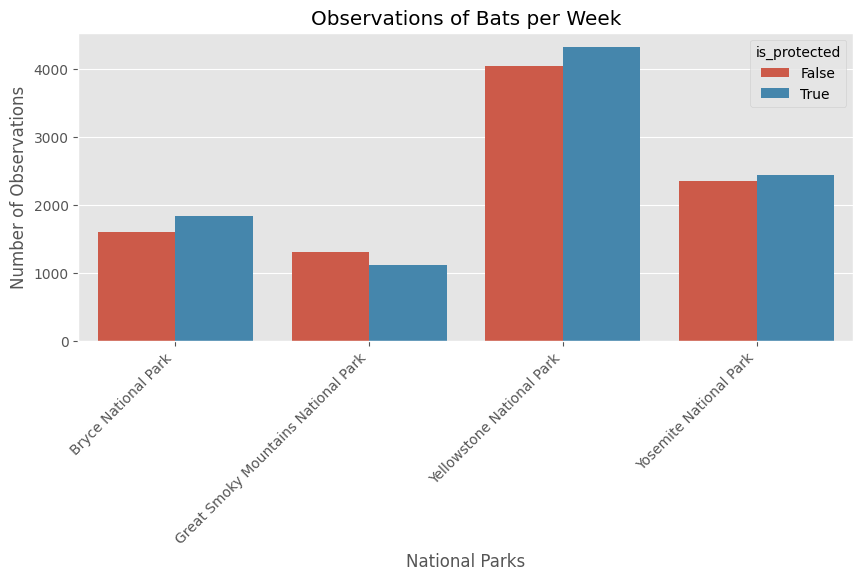

In [199]:
plt.figure(figsize=(10, 4))
sns.barplot(x=obs_by_park.park_name, y=obs_by_park.observations, hue=obs_by_park.is_protected)
plt.xticks(rotation=45, ha='right')
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week')
plt.show()

## Conclusions

The project was able to answer the following questions:
1. What is the distribution of conservation status for species?
* There are 161 Species of Concern, 16 Species Endangered, 10 Threatened and 4 in Recovery. There are 5633 species with No Intervention, so the vast majority of species were not part of conservation. 

2. Are certain types of species more likely to be endangered?
* Yes, Mammals and Birds have the highest percentage of being protected. While other species such as Reptiles and Fish could be more endangered.

3. Are the differences between species and their conservation status significant?
* Yes, the chi-square of all species showed a P-value of 5.5108280473137505e-89, which means that:
    - The probability that these protection counts across categories happended by random change is basically zero.
    - There is a strong, statistically significant association between the type of species and whether it's protected
    - Some categories (like mammals) are protected more often than others, way beyond what would happen by random chance.

4. Which animal is most prevalent and what is their distribution amongst parks?
* Bats were the animal most prevalent and the must number of bats were found in the Yellowstone National Park, with approx. 4000 bats protected.